# Spaceship Titanic by Swapnal Shahil

# 1. Defining the problem statement

Task is to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

# 2. Imports and data collection

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

titanic_train_data = pd.read_csv('train.csv')
titanic_test_data = pd.read_csv('test.csv')

# 3. Data exploration

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2)
for train_idx, test_idx in split.split(titanic_train_data, titanic_train_data[['Survived', 'Pclass', 'Sex']]):
    train = titanic_train_data.loc[train_idx]
    test = titanic_train_data.loc[test_idx]


In [71]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.300,B35,C
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.550,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.700,C47,C
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,NaN,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.775,NaN,S
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.000,NaN,S


In [72]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,575.000000,712.00000,712.000000,712.000000
mean,446.290730,0.384831,2.308989,29.964348,0.50000,0.370787,32.047583
std,256.331369,0.486897,0.835249,14.461910,1.02706,0.811410,48.595007
min,1.000000,0.000000,1.000000,0.420000,0.00000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,21.000000,0.00000,0.000000,7.925000
50%,443.000000,0.000000,3.000000,29.000000,0.00000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.00000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.00000,6.000000,512.329200


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7,G6,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S


In [74]:
train.shape

(712, 12)

In [75]:
test.shape

(179, 12)

In [76]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.300,B35,C
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.550,C22 C26,S


In [77]:
data = train.append(test)
data.shape

(891, 12)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7,G6,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S


In [79]:
#checking missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         1
dtype: int64

In [80]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             40
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          135
Embarked         1
dtype: int64

In [81]:
#checking datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4. Dealing with missing data

<AxesSubplot:>

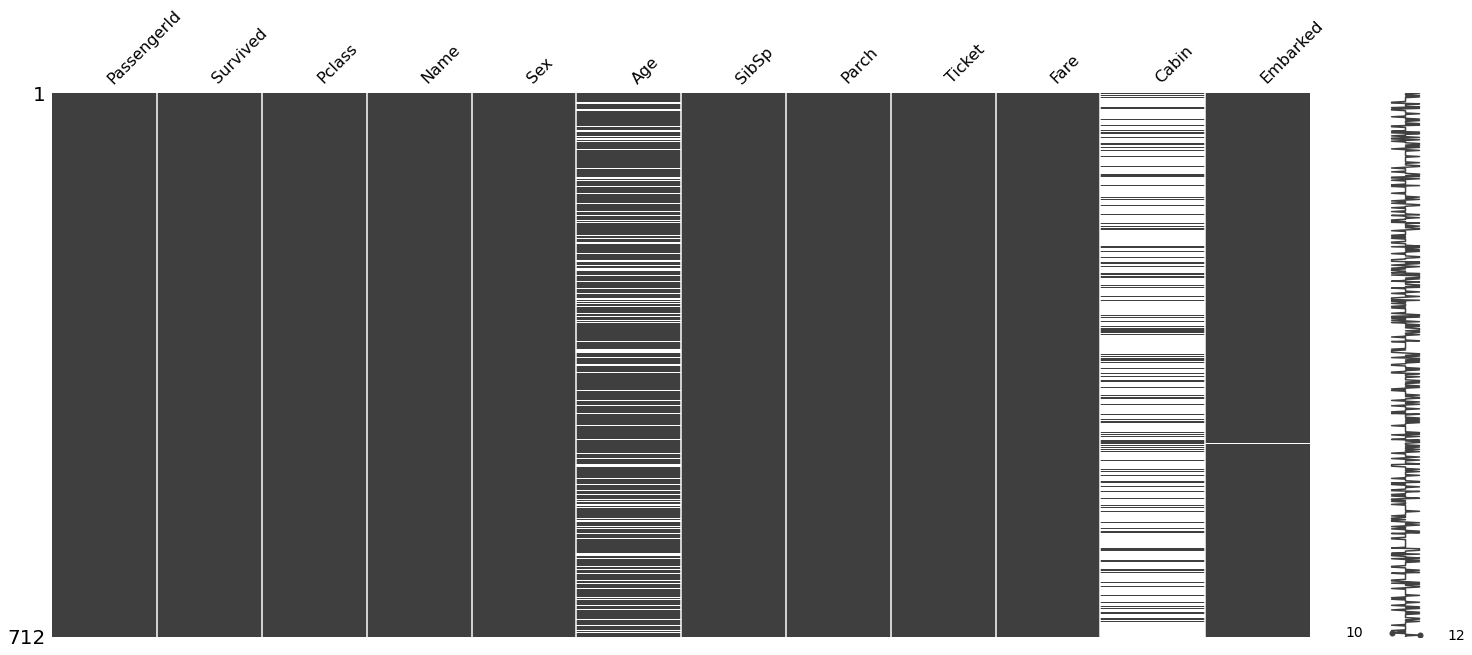

In [82]:
# visualization of missing data
import missingno as mn
mn.matrix(train)

In [83]:
#imputing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [84]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self;
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C', 'S', 'Q', 'N']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ['Female', 'Male']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
            
        return X

In [85]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X.drop(['Embarked', 'Sex', 'Name', 'Ticket', 'Cabin', 'N'], axis =1, errors = 'ignore')

In [86]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()),
                    ('featureencoder', FeatureEncoder()),
                    ('featuredropper', FeatureDropper())])

In [87]:
train = pipeline.fit_transform(train)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
889,890,1,1,26.00,0,0,30.000,1.0,0.0,0.0,0.0,1.0
864,865,0,2,24.00,0,0,13.000,0.0,0.0,1.0,0.0,1.0
316,317,1,2,24.00,1,0,26.000,0.0,0.0,1.0,1.0,0.0
394,395,1,3,24.00,0,2,16.700,0.0,0.0,1.0,1.0,0.0
655,656,0,2,24.00,2,0,73.500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,1,2,0.83,0,2,29.000,0.0,0.0,1.0,0.0,1.0
592,593,0,3,47.00,0,0,7.250,0.0,0.0,1.0,0.0,1.0
630,631,1,1,80.00,0,0,30.000,0.0,0.0,1.0,0.0,1.0
840,841,0,3,20.00,0,0,7.925,0.0,0.0,1.0,0.0,1.0


In [88]:
# checking info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 889 to 380
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [89]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_data = train.drop(['Survived'], axis = 1)
y_data = train['Survived']

X = scaler.fit_transform(X_data)
y = y_data.to_numpy()

In [90]:
X

array([[ 1.73221559, -1.56828591, -0.30530234, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       [ 1.63461702, -0.37019624, -0.45932633, ...,  0.60981061,
        -0.73561236,  0.73561236],
       [-0.50474361, -0.37019624, -0.45932633, ...,  0.60981061,
         1.35941164, -1.35941164],
       ...,
       [ 0.72109441, -1.56828591,  3.85334546, ...,  0.60981061,
        -0.73561236,  0.73561236],
       [ 1.54092239,  0.82789342, -0.76737432, ...,  0.60981061,
        -0.73561236,  0.73561236],
       [-0.25489127, -1.56828591,  0.9268896 , ..., -1.6398534 ,
         1.35941164, -1.35941164]])

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameter = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth" : [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, parameter, cv=3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [92]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

In [93]:
test = pipeline.fit_transform(test)

In [94]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
716,717,1,1,38.000000,0,0,227.525,1.0,0.0,0.0,1.0,0.0
33,34,0,2,66.000000,0,0,10.500,0.0,0.0,1.0,0.0,1.0
763,764,1,1,36.000000,1,2,120.000,0.0,0.0,1.0,1.0,0.0
641,642,1,1,24.000000,0,0,69.300,1.0,0.0,0.0,1.0,0.0
498,499,0,1,25.000000,1,2,151.550,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,28.601942,0,0,29.700,1.0,0.0,0.0,0.0,1.0
442,443,0,3,25.000000,1,0,7.775,0.0,0.0,1.0,0.0,1.0
162,163,0,3,26.000000,0,0,7.775,0.0,0.0,1.0,0.0,1.0
417,418,1,2,18.000000,0,2,13.000,0.0,0.0,1.0,1.0,0.0


In [95]:
X_test = test.drop(['Survived'], axis=1)
y_test = test['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [96]:
final_clf.score(X_data_test,y_data_test)

0.8100558659217877

In [97]:
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
final_data = pipeline.fit_transform(titanic_train_data)

In [99]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [100]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [104]:
production_clf = RandomForestClassifier()
parameter = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth" : [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(production_clf, parameter, cv=3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [105]:
production_final_clf = grid_search.best_estimator_

In [106]:
production_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [107]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [108]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [109]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [111]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')
scaler = StandardScaler()

X_data_final_test = scaler.fit_transform(X_final_test)

In [112]:
prediction = production_final_clf.predict(X_data_final_test)

In [113]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [114]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = prediction
final_df.to_csv('predictions.csv', index = False)

In [115]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
